# Ejercicio 13: Resolver una EDO

## Sebastián Tapia

## P3

Resolver y graficar los resultados de la siguiente EDO usando los métodos vistos en clases:
 $$f(t, y) = y'(t) = v_0 - gt$$

 Donde:
 - $t$ es el tiempo
 - $y$ es la altura de un proyectil
 - $v_0$ es la velocidad vertical inicial
 - $t_0 = 0$ tiempo inicial
 - $y_0 = 0$ altura inicial
 - $g$ es la aceleración de gravedad
 - Asumiremos velocidad constante


## Método de Euler

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h(v_0 -gt)$


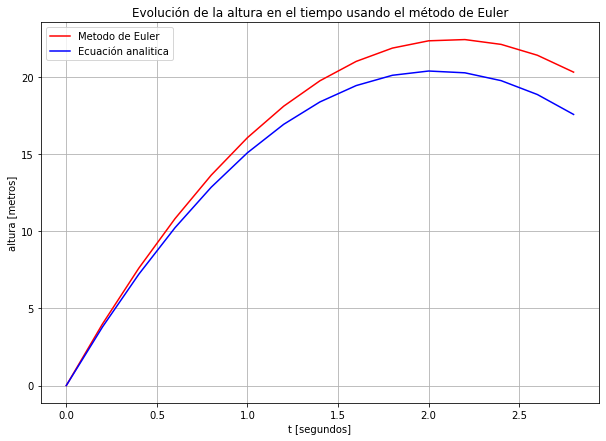

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + h*function(t_values[i - 1])

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo de Euler')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando el método de Euler')
ax.legend()
ax.grid()

plt.show()

## Método de Series de Taylor

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h T_2(t_i, y_i)$

Donde:

$$
T_2(t_i, y_i) = f(t_i, y_i) + \frac{1}{2!}h^2f'(t_i,y_i)
$$

$$
f'(t, y) = \frac{\partial}{\partial{t}}f(t, y) + \frac{\partial}{\partial{y}}f(t, y)\frac{\partial{y}}{\partial{t}}
$$

Por lo tanto:

$$
T_2(t_i, y_i) = (v_0 -gt_i) + \frac{1}{2!}h^2(- g + (v_0 -gt_i))
$$

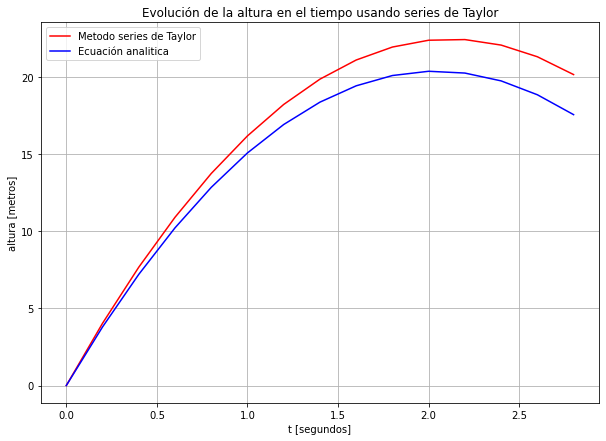

In [14]:
h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t + (1/2)*h*h*( -g + (v0 - g*t))

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + h*function(t_values[i - 1])

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo series de Taylor')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando series de Taylor')
ax.legend()
ax.grid()

plt.show()

## Método de Runge Kutta 2 - Euler Modificado

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h F(t_i, y_i)$

Donde:

$$
F(t_i, y_i) = w_1f(t_i, y_i) + w_2f(t_i + ah, y_i +ahf(x_i, y_i))
$$

Como es la versión Euler modificado: $a=\frac{1}{2}$, $w_1=0$ y $w_2= 1$

Por lo tanto:

$$
F(t_i, y_i) = f(t_i + \frac{h}{2}, y_i + \frac{h}{2}f(t_i, y_i)) = v_0 -g(t_i + \frac{h}{2})
$$

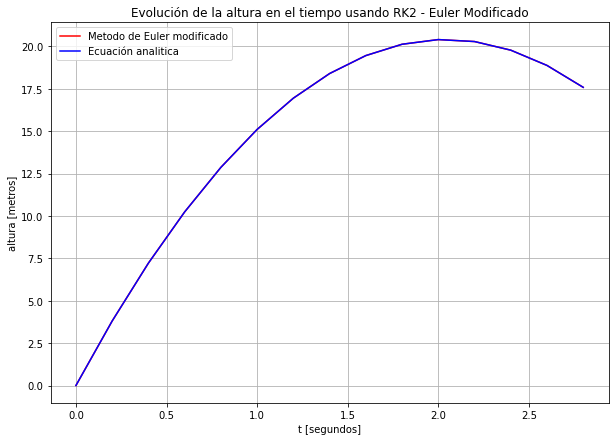

In [15]:
h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t 

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + h*function(t_values[i - 1] + h/2)

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo de Euler modificado')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando RK2 - Euler Modificado')
ax.legend()
ax.grid()

plt.show()

## Método de Runge Kutta 2 - Euler Mejorado

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h F(t_i, y_i)$

Donde:

$$
F(t_i, y_i) = w_1f(t_i, y_i) + w_2f(t_i + ah, y_i +ahf(x_i, y_i))
$$

Como es la versión Euler mejorado: $a=1$, $w_1= w_2= 0.5$

Por lo tanto:

$$
F(t_i, y_i) = \frac{1}{2}f(t_i, y_i) +  \frac{1}{2}f(t_i + h, y_i +hf(t_i, y_i)) = \frac{1}{2}(v_0 -gt_i + v_0 -g(t_i + h))
$$

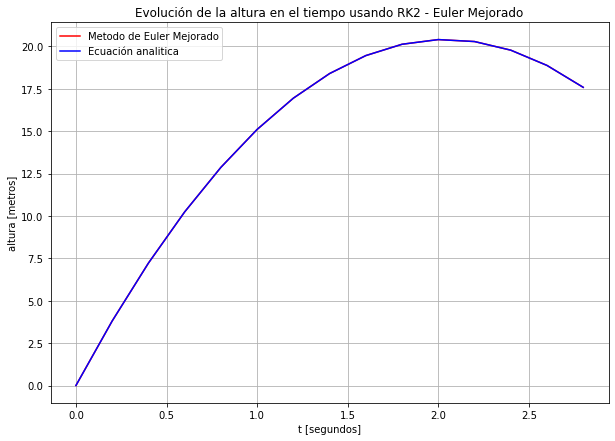

In [16]:
h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t 

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + (h/2)*( function(t_values[i - 1]) + function(t_values[i - 1] + h) )

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo de Euler Mejorado')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando RK2 - Euler Mejorado')
ax.legend()
ax.grid()

plt.show()

## Método de Runge Kutta de 4 etapas

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + \frac{h}{6}\left[K_1(t_i, y_i) + 2K_2(t_i, y_i) + 2K_3(t_i, y_i) + K_4(t_i, y_i)\right]$

Donde:

$$
K_1(t_i, y_i) = f(t_i, y_i) = v_0 -gt_i
$$

$$
K_2(t_i, y_i) = f\left(t_i + \frac{h}{2}, y_i + \frac{h}{2}K_1(t_i, y_i)\right) = v_0 -g\left(t_i +\frac{h}{2}\right)
$$

$$
K_3(t_i, y_i) = f\left(t_i + \frac{h}{2}, y_i + \frac{h}{2}K_2(t_i, y_i)\right) = v_0 -g\left(t_i +\frac{h}{2}\right)
$$

$$
K_4(t_i, y_i) = f\left(t_i + h, y_i + hK_3(t_i, y_i)\right) = v_0 -g(t_i+ h)
$$


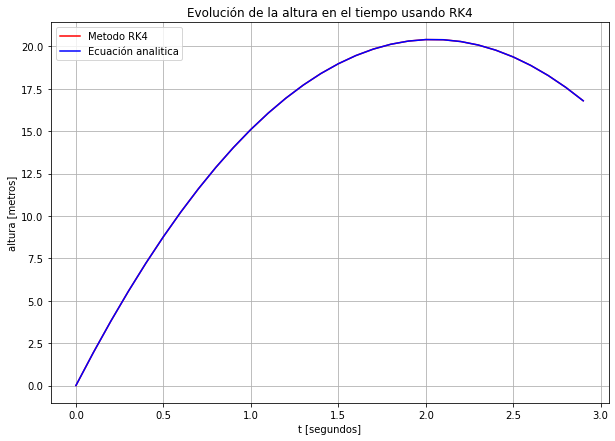

In [17]:
h = 0.1
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t 

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        k1 = function(t_values[i - 1])
        k2 = function(t_values[i - 1] + (h/2))
        k3 = function(t_values[i - 1] + (h/2))
        k4 = function(t_values[i - 1] + h)

        y_values[i] = y_values[i - 1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo RK4')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando RK4')
ax.legend()
ax.grid()

plt.show()

## Ejercicio
Resolver y graficar los resultados de la siguiente EDO usando los metodos de Euler, Series de Taylor y RK4:

$$y'(t) = -2y(t) + \cos(4t)$$

con condición inicial $y_0 = 3$, donde por cada metodo debe generar un grafico con al menos tres curvas que representen 
distintos valores de $h$ tal que las lineas dibujadas representen a $y(t)$ con diferente presicion, ejemplo: resolver para $h = 0.8$, $h = 0.2$ y $h = 0.02$ con $t\in(0, 2)$

## Método de Euler

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h(-2y_i + \cos(4t) )$


In [76]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def euler_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda t, y : -2*y + np.cos(4*t)

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            y_values[i] = y_values[i - 1] + h*function(t_values[i-1], y_values[i-1], )
    return t_values, y_values


def taylor_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda t, y : -2*y + np.cos(4*t) + (1/2)*h*h*(-2*(-2*y + np.cos(4*t)) - 4*np.sin(4*t))

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            y_values[i] = y_values[i - 1] + h*function(t_values[i-1], y_values[i-1],)
    return t_values, y_values


def euler_modified_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda t, y : -2*y + np.cos(4*t)

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            
            K1 = h/2*function(t_values[i-1], y_values[i-1])

            y_values[i] = y_values[i - 1] + h*function(t_values[i-1]+h/2, y_values[i-1]+K1)

    return t_values, y_values


def euler_improved_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda t, y : -2*y + np.cos(4*t)

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            
            K1 = h*function(t_values[i-1], y_values[i-1])
            F = function(t_values[i-1], y_values[i-1]) + function(t_values[i-1]+h, y_values[i-1]+K1)
            
            y_values[i] = y_values[i - 1] + h/2*F

    return t_values, y_values

$ F(t_i, y_i) = \frac{1}{2}f(t_i, y_i) +  \frac{1}{2}f(t_i + h, y_i +hf(t_i, y_i))$

In [77]:
def plot_euler():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = euler_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de Euler, con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
        title='EDO usando método de Euler')
    ax.legend()
    ax.grid()

    plt.show()

    
def plot_taylor():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = taylor_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de series de Taylor, con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
        title='EDO usando método de series de Taylor')
    ax.legend()
    ax.grid()

    plt.show()

    
def plot_modified_euler():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = euler_modified_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de Euler modificado, con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
        title='EDO usando método de Euler modificado')
    ax.legend()
    ax.grid()

    plt.show()

    
def plot_improved_euler():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = euler_improved_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de Euler mejorado, con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
        title='EDO usando método de Euler mejorado')
    ax.legend()
    ax.grid()

    plt.show()

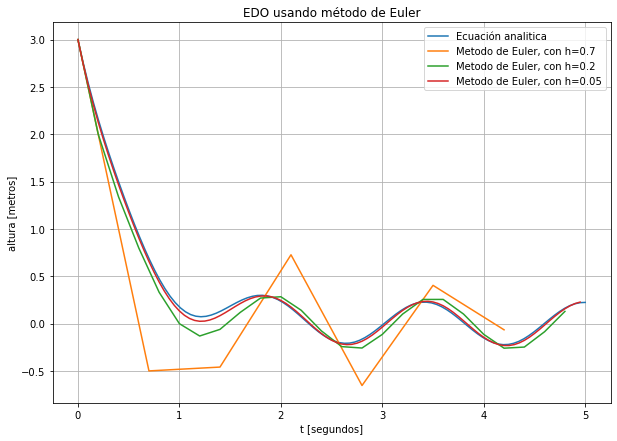

In [63]:
plot_euler()

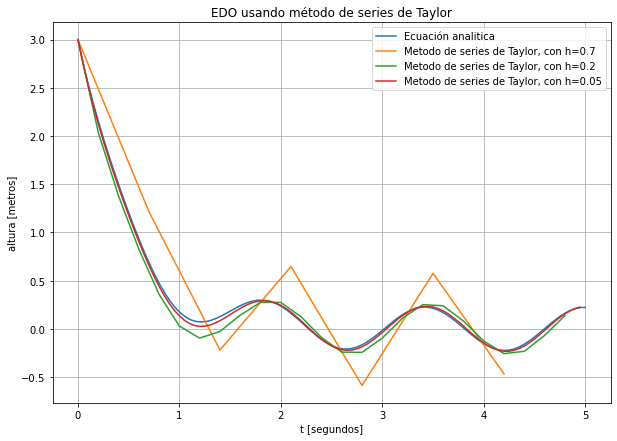

In [64]:
plot_taylor()

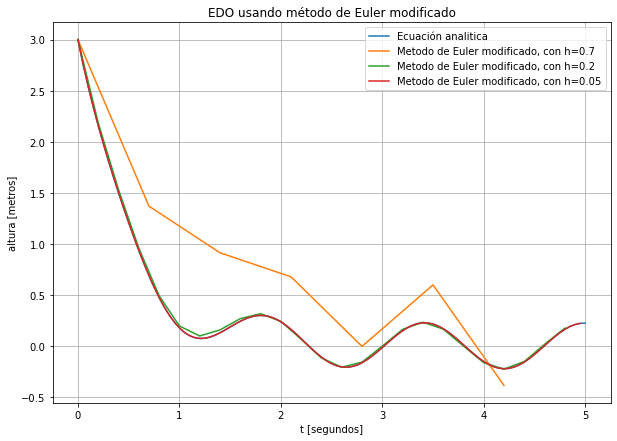

In [65]:
plot_modified_euler()

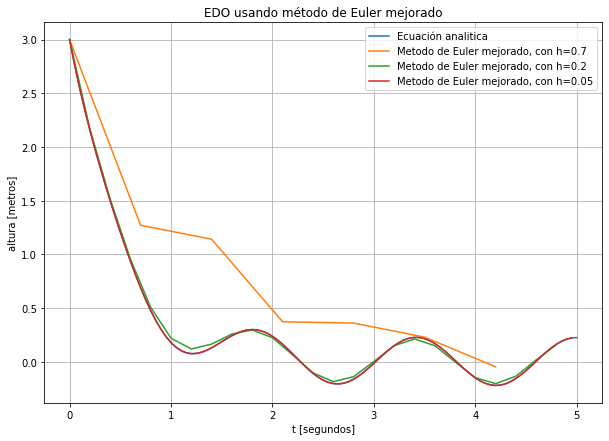

In [78]:
plot_improved_euler()